In [31]:
import numpy as np
from sklearn import datasets
from sklearn import decomposition
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

iris=datasets.load_iris()
X=iris.data
y=iris.target

PCA and plotting PCA

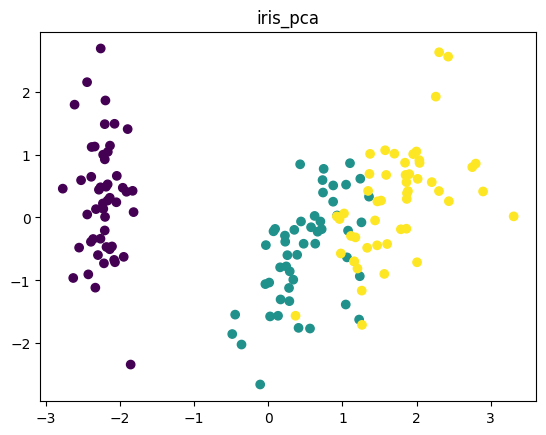

In [2]:
pca=decomposition.PCA(n_components=2)
iris_pca=pca.fit_transform(StandardScaler().fit_transform(X))
plt.figure()
plt.title('iris_pca')
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=y)


K-Means

75

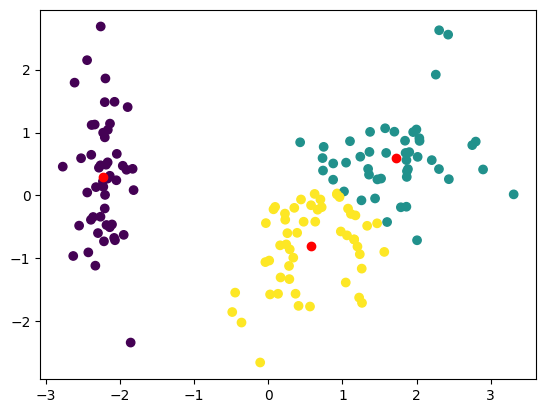

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3).fit(iris_pca)
iris_cluster=kmeans.transform(iris_pca)
centers=kmeans.cluster_centers_

labels=kmeans.labels_
plt.figure()
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],c='r')
list(labels != y).count(True)

plotting theorical labels and kmeans ones

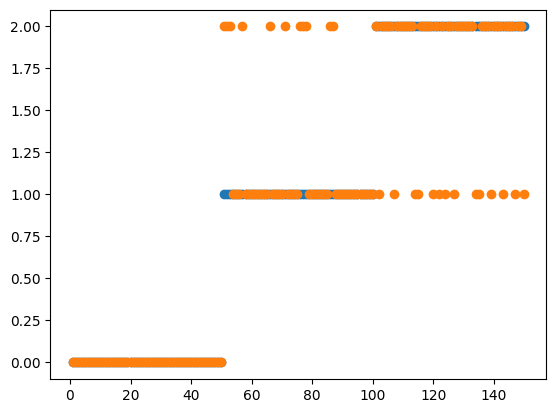

In [45]:
plt.figure()
plt.scatter(np.linspace(1,150,150),y)
plt.scatter(np.linspace(1,150,150),labels)

With the originals data

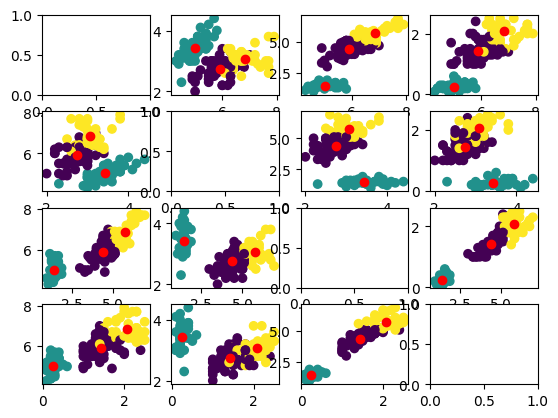

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3).fit(X)
iris_cluster=kmeans.transform(X)
centers=kmeans.cluster_centers_

labels=kmeans.labels_
fig,ax=plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        if i!=j:
            ax[i,j].scatter(X[:,i],X[:,j],c=labels)
            ax[i,j].scatter(centers[:,i],centers[:,j],c='r')

pros for the the originals data: we can see which variables provide the best clustering and choose the best combination of variables to visualise the data
cons for the originals data: many visualisations to do and the clusters are often degenerated wheras for the pca's data the clusters can be clearly iditified and separated.

The same exercice with k-nn

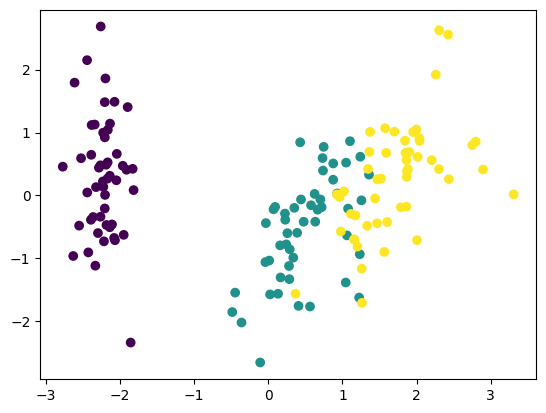

In [20]:
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split,validation_curve
from sklearn.metrics import accuracy_score

#searching the best value of k

scor=[]
for k in np.arange(1,100):
    model=KNeighborsClassifier(k)
    model=model.fit(iris_pca,y)
    y_predic=model.predict(iris_pca)
    scor.append(accuracy_score(y,y_predic))
best_n_neighbors=scor.index(max(scor))+1
best_n_neighbors

knn=KNeighborsClassifier(n_neighbors= best_n_neighbors)
iris_knn=knn.fit(iris_pca,y)
knn_predicted=iris_knn.predict(iris_pca)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=knn_predicted)




optimal number cluster in exoplant data

In [34]:
import pandas as pd
from sklearn.metrics import davies_bouldin_score
df=pd.read_csv("/home/ing/Bureau/tp_AP/exo4_atm_extr.csv",sep=';',header=None)
df
pr_labls=df.columns[11]
data=df.drop(labels=0,axis=0).drop(labels=11,axis=1)
data

,0,1,2,3,4,5,6,7,8,9,10
1,0,8.7,1.3,87.3,0,2.7,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0.02
3,0.1,7.1,1.7,86.45,0,1.15,0,0,0,3.5,0
4,0,2.7,0,3.7,41.5,0,31.3,6.6,14.2,0,0
5,0.1,11.4,1.1,86.1,0,0.2,0,0,0,1.1,0
...,...,...,...,...,...,...,...,...,...,...,...
996,0,0,0,0,3.8,0.5,0.1,1.01,94.59,0,0
997,4,0,1.4,0,11.7,0,2.5,0,30.6,49.76,0.04
998,0,0,0,0,0,0,0,0,0,0,0
999,0,1.6,0,21.9,55,0.3,13.1,6.5,1.6,0,0


**Davies-Bouldin**
The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances. Thus, clusters which are farther apart and less dispersed will result in a better score.

The minimum score is zero, with lower values indicating better clustering.

In [30]:
bests=np.zeros((9,))
    
for i in range(2,11):
    k_means=KMeans(n_clusters=i).fit(data)
    y=k_means.labels_
    mean_iter_dbouldin=0
    for j in range(10):
        mean_iter_dbouldin +=davies_bouldin_score(data,y)
    bests[i-2]=mean_iter_dbouldin/10
best_nclust=bests.argmax()+2
best_nclust

9

cluster visualisation of exoplanet data

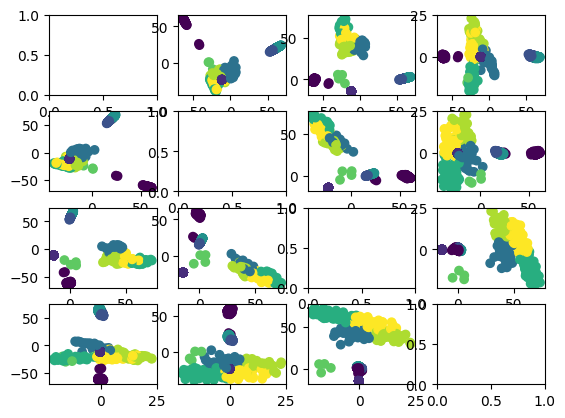

In [33]:
p_pca=decomposition.PCA(n_components=4).fit(StandardScaler().fit_transform(data))
planet_pca=p_pca.fit_transform(data)
p_kmeans=KMeans(n_clusters=9).fit(data)
p_labls=p_kmeans.labels_
fig,ax=plt.subplots(4,4)
for i in range(4):
    for j in range(4):
        if i!=j:
            ax[i,j].scatter(planet_pca[:,i],planet_pca[:,j],c=p_labls)



In [35]:
pr_labls

11